# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 


# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep = ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep = ';')

In [3]:
# Check the structure of the data after it's loaded 

azdias.describe()

AGER_TYP  ALTERSKATEGORIE_GROB      ANREDE_KZ  CJT_GESAMTTYP  \
count  891221.000000         891221.000000  891221.000000  886367.000000   
mean       -0.358435              2.777398       1.522098       3.632838   
std         1.198724              1.068775       0.499512       1.595021   
min        -1.000000              1.000000       1.000000       1.000000   
25%        -1.000000              2.000000       1.000000       2.000000   
50%        -1.000000              3.000000       2.000000       4.000000   
75%        -1.000000              4.000000       2.000000       5.000000   
max         3.000000              9.000000       2.000000       6.000000   

       FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
count      891221.000000  891221.000000     891221.000000   891221.000000   
mean            3.074528       2.821039          3.401106        3.033328   
std             1.321055       1.464749          1.322134        1.529603   
min             1.000000       1.000000          1.000000        1.000000   
25%             2.000000       1.000000          3.000000        2.000000   
50%             3.000000       3.000000          3.000000        3.000000   
75%             4.000000       4.000000          5.000000        5.000000   
max             5.000000       5.000000          5.000000        5.000000   

       FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER      ...          PLZ8_ANTG1  \
count          891221.000000     891221.000000      ...       774706.000000   
mean                2.874167          3.075121      ...            2.253330   
std                 1.486731          1.353248      ...            0.972008   
min                 1.000000          1.000000      ...            0.000000   
25%                 2.000000          2.000000      ...            1.000000   
50%                 3.000000          3.000000      ...            2.000000   
75%                 4.000000          4.000000      ...            3.000000   
max                 5.000000          5.000000      ...            4.000000   

          PLZ8_ANTG2     PLZ8_ANTG3     PLZ8_ANTG4    PLZ8_BAUMAX  \
count  774706.000000  774706.000000  774706.000000  774706.000000   
mean        2.801858       1.595426       0.699166       1.943913   
std         0.920309       0.986736       0.727137       1.459654   
min         0.000000       0.000000       0.000000       1.000000   
25%         2.000000       1.000000       0.000000       1.000000   
50%         3.000000       2.000000       1.000000       1.000000   
75%         3.000000       2.000000       1.000000       3.000000   
max         4.000000       3.000000       2.000000       5.000000   

            PLZ8_HHZ       PLZ8_GBZ         ARBEIT    ORTSGR_KLS9  \
count  774706.000000  774706.000000  794005.000000  794005.000000   
mean        3.612821       3.381087       3.167854       5.293002   
std         0.973967       1.111598       1.002376       2.303739   
min         1.000000       1.000000       1.000000       0.000000   
25%         3.000000       3.000000       3.000000       4.000000   
50%         4.000000       3.000000       3.000000       5.000000   
75%         4.000000       4.000000       4.000000       7.000000   
max         5.000000       5.000000       9.000000       9.000000   

           RELAT_AB  
count  794005.00000  
mean        3.07222  
std         1.36298  
min         1.00000  
25%         2.00000  
50%         3.00000  
75%         4.00000  
max         9.00000  

[8 rows x 81 columns]

In [4]:
feat_info.describe()

attribute information_level     type missing_or_unknown
count             85                85       85                 85
unique            85                 9        5                  9
top     KK_KUNDENTYP            person  ordinal               [-1]
freq               1                43       49                 26

In [5]:
feat_info.head()

attribute information_level         type missing_or_unknown
0              AGER_TYP            person  categorical             [-1,0]
1  ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2             ANREDE_KZ            person  categorical             [-1,0]
3         CJT_GESAMTTYP            person  categorical                [0]
4     FINANZ_MINIMALIST            person      ordinal               [-1]

In [6]:
azdias.isna().sum()

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [7]:
azdias.head()

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER    ...     PLZ8_ANTG1  PLZ8_ANTG2  \
0                      5                 3    ...            NaN         NaN   
1                      4                 5    ...            2.0         3.0   
2                      3                 5    ...            3.0         3.0   
3                      1                 2    ...            2.0         2.0   
4                      3                 2    ...            2.0         4.0   

   PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  \
0         NaN         NaN          NaN       NaN       NaN     NaN   
1         2.0         1.0          1.0       5.0       4.0     3.0   
2         1.0         0.0          1.0       4.0       4.0     3.0   
3         2.0         0.0          1.0       3.0       4.0     2.0   
4         2.0         1.0          2.0       3.0       3.0     4.0   

   ORTSGR_KLS9  RELAT_AB  
0          NaN       NaN  
1          5.0       4.0  
2          5.0       2.0  
3          3.0       3.0  
4          6.0       5.0  

[5 rows x 85 columns]

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [8]:
feat_info

attribute information_level         type missing_or_unknown
0                AGER_TYP            person  categorical             [-1,0]
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2               ANREDE_KZ            person  categorical             [-1,0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
11            GEBURTSJAHR            person      numeric                [0]
12        GFK_URLAUBERTYP            person  categorical                 []
13       GREEN_AVANTGARDE            person  categorical                 []
14             HEALTH_TYP            person      ordinal             [-1,0]
15    LP_LEBENSPHASE_FEIN            person        mixed                [0]
16    LP_LEBENSPHASE_GROB            person        mixed                [0]
17        LP_FAMILIE_FEIN            person  categorical                [0]
18        LP_FAMILIE_GROB            person  categorical                [0]
19         LP_STATUS_FEIN            person  categorical                [0]
20         LP_STATUS_GROB            person  categorical                [0]
21       NATIONALITAET_KZ            person  categorical             [-1,0]
22  PRAEGENDE_JUGENDJAHRE            person        mixed             [-1,0]
23         RETOURTYP_BK_S            person      ordinal                [0]
24              SEMIO_SOZ            person      ordinal             [-1,9]
25              SEMIO_FAM            person      ordinal             [-1,9]
26              SEMIO_REL            person      ordinal             [-1,9]
27              SEMIO_MAT            person      ordinal             [-1,9]
28             SEMIO_VERT            person      ordinal             [-1,9]
29             SEMIO_LUST            person      ordinal             [-1,9]
..                    ...               ...          ...                ...
55            OST_WEST_KZ          building  categorical               [-1]
56               WOHNLAGE          building        mixed               [-1]
57        CAMEO_DEUG_2015     microcell_rr4  categorical             [-1,X]
58         CAMEO_DEU_2015     microcell_rr4  categorical               [XX]
59        CAMEO_INTL_2015     microcell_rr4        mixed            [-1,XX]
60            KBA05_ANTG1     microcell_rr3      ordinal               [-1]
61            KBA05_ANTG2     microcell_rr3      ordinal               [-1]
62            KBA05_ANTG3     microcell_rr3      ordinal               [-1]
63            KBA05_ANTG4     microcell_rr3      ordinal               [-1]
64           KBA05_BAUMAX     microcell_rr3        mixed             [-1,0]
65              KBA05_GBZ     microcell_rr3      ordinal             [-1,0]
66               BALLRAUM          postcode      ordinal               [-1]
67               EWDICHTE          postcode      ordinal               [-1]
68             INNENSTADT          postcode      ordinal               [-1]
69     GEBAEUDETYP_RASTER        region_rr1      ordinal                 []
70                    KKK        region_rr1      ordinal             [-1,0]
71             MOBI_REGIO        region_rr1      ordinal                 []
72      ONLINE_AFFINITAET        region_rr1      ordinal                 []
73               REGIOTYP        region_rr1      ordinal             [-1,0]
74       KBA13_ANZAHL_PKW    macrocell_plz8      numeric                 []
75             PLZ8_ANTG1    macrocell_plz8      ordinal        

In [9]:
feat_info.dtypes

attribute             object
information_level     object
type                  object
missing_or_unknown    object
dtype: object

In [10]:
# Turning the 'missing_or_unknown' in 'feat_info' to list.
feat_info['missing_or_unknown'] = feat_info['missing_or_unknown'].str.replace(']','').str.replace('[','').str.split(',')

for i in feat_info['missing_or_unknown'][1]:
    print (i)

-1
0
9


In [11]:
# Identify missing or unknown data values and convert them to NaNs.

azdias.head()

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER    ...     PLZ8_ANTG1  PLZ8_ANTG2  \
0                      5                 3    ...            NaN         NaN   
1                      4                 5    ...            2.0         3.0   
2                      3                 5    ...            3.0         3.0   
3                      1                 2    ...            2.0         2.0   
4                      3                 2    ...            2.0         4.0   

   PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  \
0         NaN         NaN          NaN       NaN       NaN     NaN   
1         2.0         1.0          1.0       5.0       4.0     3.0   
2         1.0         0.0          1.0       4.0       4.0     3.0   
3         2.0         0.0          1.0       3.0       4.0     2.0   
4         2.0         1.0          2.0       3.0       3.0     4.0   

   ORTSGR_KLS9  RELAT_AB  
0          NaN       NaN  
1          5.0       4.0  
2          5.0       2.0  
3          3.0       3.0  
4          6.0       5.0  

[5 rows x 85 columns]

In [12]:
feat_info.head()

attribute information_level         type missing_or_unknown
0              AGER_TYP            person  categorical            [-1, 0]
1  ALTERSKATEGORIE_GROB            person      ordinal         [-1, 0, 9]
2             ANREDE_KZ            person  categorical            [-1, 0]
3         CJT_GESAMTTYP            person  categorical                [0]
4     FINANZ_MINIMALIST            person      ordinal               [-1]

In [13]:
# Identify missing or unknown data values and convert them to NaNs.

for col, missing_values in zip(feat_info['attribute'], feat_info['missing_or_unknown']):
    if missing_values[0] != '':
        for value in missing_values:
            if value.isnumeric() or value.lstrip('-').isnumeric():
                value = int(value)
            azdias.loc[azdias[col] == value, col] = np.nan

In [14]:
azdias.T

0      1      2      3      4      5      6      7       \
AGER_TYP                 NaN    NaN    NaN      2    NaN      3    NaN    NaN   
ALTERSKATEGORIE_GROB       2      1      3      4      3      1      2      1   
ANREDE_KZ                  1      2      2      2      1      2      2      1   
CJT_GESAMTTYP              2      5      3      2      5      2      5      3   
FINANZ_MINIMALIST          3      1      1      4      4      3      1      3   
FINANZ_SPARER              4      5      4      2      3      1      5      3   
FINANZ_VORSORGER           3      2      1      5      4      5      1      4   
FINANZ_ANLEGER             5      5      2      2      1      2      5      1   
FINANZ_UNAUFFAELLIGER      5      4      3      1      3      2      4      3   
FINANZ_HAUSBAUER           3      5      5      2      2      5      3      2   
FINANZTYP                  4      1      1      6      5      2      4      5   
GEBURTSJAHR              NaN   1996   1979   1957   1963   1943    NaN   1964   
GFK_URLAUBERTYP           10     10     10      1      5      1     12      9   
GREEN_AVANTGARDE           0      0      1      0      0      0      0      0   
HEALTH_TYP               NaN      3      3      2      3      3      2      1   
LP_LEBENSPHASE_FEIN       15     21      3    NaN     32      8      2      5   
LP_LEBENSPHASE_GROB        4      6      1    NaN     10      2      1      2   
LP_FAMILIE_FEIN            2      5      1    NaN     10      1      1      1   
LP_FAMILIE_GROB            2      3      1    NaN      5      1      1      1   
LP_STATUS_FEIN             1      2      3      9      3      4      2      1   
LP_STATUS_GROB             1      1      2      4      2      2      1      1   
NATIONALITAET_KZ         NaN      1      1      1      1      1      1      1   
PRAEGENDE_JUGENDJAHRE    NaN     14     15      8      8      3     10      8   
RETOURTYP_BK_S             5      1      3      2      5      3      4      5   
SEMIO_SOZ                  2      5      4      5      6      2      2      7   
SEMIO_FAM                  6      4      1      1      4      4      5      7   
SEMIO_REL                  7      4      3      2      4      7      5      7   
SEMIO_MAT                  5      3      3      1      2      4      7      5   
SEMIO_VERT                 1      1      4      4      7      2      2      6   
SEMIO_LUST                 5      2      4      4      4      2      6      2   
...                      ...    ...    ...    ...    ...    ...    ...    ...   
OST_WEST_KZ              NaN      W      W      W      W      W      W      W   
WOHNLAGE                 NaN      4      2      7      3      7      5      1   
CAMEO_DEUG_2015          NaN      8      4      2      6      8      4      2   
CAMEO_DEU_2015           NaN     8A     4C     2A     6B     8C     4A     2D   
CAMEO_INTL_2015          NaN     51     24     12     43     54     22     14   
KBA05_ANTG1              NaN      0      1      4      1      2      3      2   
KBA05_ANTG2              NaN      0      3      1      4      2      2      2   
KBA05_ANTG3              NaN      0      1      0      1      0      0      0   
KBA05_ANTG4              NaN      2      0      0      0      0      0      0   
KBA05_BAUMAX             NaN      5    NaN      1    NaN    NaN      1    NaN   
KBA05_GBZ                NaN      1      3      4      3      4      3      4   
BALLRAUM                 NaN      6      2      4      2      6      6      2   
EWDICHTE                 NaN      3      4      2      5      2      4      5   
INNENSTADT               NaN      8      4      6      1      7      3      3   
GEBAEUDETYP_RASTER       NaN      3      4      4      5      4      5      4   
KKK                      NaN      2      2    NaN      3      4      3      1   
MOBI_REGIO               NaN      1      3      4      3      4      5      4   
ONLINE_AFFINITAET          1      3      2      1    

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [15]:
# Count total number of missing data
total_na = azdias.isna().sum().sum()
print('Total Number of NaNs is :', total_na)

# Filter the missing data as series
azdias_na = azdias.isnull().sum()[azdias.isnull().sum() > 0]

# Calculate the percentage of missing data and sort them
azdias_na_percent = azdias_na.values/azdias.shape[0]*100

# Convert Numpy array to Pandas dataframe amd sort it
df_azdias_na_percent = pd.DataFrame(data=azdias_na_percent, index=azdias_na.index, columns=['Percent'])
df_azdias_na_percent.sort_values(by='Percent', inplace=True,ascending=False)

# Outputs the missing data series sorted
df_azdias_na_percent

Total Number of NaNs is : 8373929


Percent
TITEL_KZ               99.757636
AGER_TYP               76.955435
KK_KUNDENTYP           65.596749
KBA05_BAUMAX           53.468668
GEBURTSJAHR            44.020282
ALTER_HH               34.813699
KKK                    17.735668
REGIOTYP               17.735668
W_KEIT_KIND_HH         16.605084
KBA05_ANTG3            14.959701
KBA05_ANTG1            14.959701
KBA05_ANTG2            14.959701
KBA05_GBZ              14.959701
KBA05_ANTG4            14.959701
MOBI_REGIO             14.959701
PLZ8_ANTG2             13.073637
PLZ8_ANTG1             13.073637
PLZ8_ANTG3             13.073637
PLZ8_ANTG4             13.073637
PLZ8_BAUMAX            13.073637
PLZ8_HHZ               13.073637
PLZ8_GBZ               13.073637
VERS_TYP               12.476816
SHOPPER_TYP            12.476816
HEALTH_TYP             12.476816
NATIONALITAET_KZ       12.153551
PRAEGENDE_JUGENDJAHRE  12.136608
KBA13_ANZAHL_PKW       11.871354
ANZ_HAUSHALTE_AKTIV    11.176913
CAMEO_INTL_2015        11.147852
...                          ...
CAMEO_DEU_2015         11.147852
LP_LEBENSPHASE_FEIN    10.954859
ARBEIT                 10.926022
RELAT_AB               10.926022
ORTSGR_KLS9            10.914689
ANZ_HH_TITEL           10.884842
LP_LEBENSPHASE_GROB    10.611509
INNENSTADT             10.518154
BALLRAUM               10.518154
EWDICHTE               10.518154
GEBAEUDETYP_RASTER     10.452514
WOHNLAGE               10.451729
OST_WEST_KZ            10.451729
MIN_GEBAEUDEJAHR       10.451729
GEBAEUDETYP            10.451729
LP_FAMILIE_GROB         8.728699
LP_FAMILIE_FEIN         8.728699
KONSUMNAEHE             8.299737
WOHNDAUER_2008          8.247000
ANZ_TITEL               8.247000
ANZ_PERSONEN            8.247000
SOHO_KZ                 8.247000
HH_EINKOMMEN_SCORE      2.058749
RETOURTYP_BK_S          0.544646
LP_STATUS_GROB          0.544646
LP_STATUS_FEIN          0.544646
GFK_URLAUBERTYP         0.544646
CJT_GESAMTTYP           0.544646
ONLINE_AFFINITAET       0.544646
ALTERSKATEGORIE_GROB    0.323264

[61 rows x 1 columns]

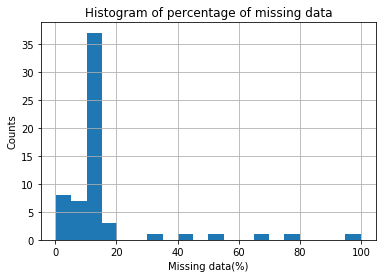

In [16]:
# Perform an assessment of how much missing data there is in each column of the dataset.

df_azdias_na_percent.hist(bins = 20)
plt.xlabel('Missing data(%)')
plt.ylabel('Counts')
plt.title('Histogram of percentage of missing data');

### Based the histogram above, there are a limited numbers of the features (6 features) that has more than 20% missing data

In [17]:
# Investigate patterns in the amount of missing data in each column.
df_azdias_na_percent['Percent'].plot(kind='bar', figsize = (18,12));

### The 6 features we highlighted above as the one containing more than 20% missing values are identified here as below. It is also a good idea to understand what these features are therfore the features are checked against their descriptions available in 'Data_Dictionary.md'

- TITLE_KZ (Academic title flag)
- AGER_TYP (Best-ager typology)
- KK_KUNDENTYP (Consumer pattern over past 12 months)
- KBA05_BAUMAX (Most common building type within the microcell)
- GEBURSTJAHR (Year of Birth)
- ALTER_HH (Birthdate of head of household)


In [18]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
col_to_drop = ['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH']

azdias_clean1 = azdias.drop(columns = col_to_drop)
print('azdias dataframe shape',azdias.shape)
print('azdias dataframe shape after dropping',azdias_clean1.shape)

azdias dataframe shape (891221, 85)
azdias dataframe shape after dropping (891221, 79)


#### Discussion 1.1.2: Assess Missing Data in Each Column

- Out of 85 columns, 79 of them have missing data with different magnitude
- 6 Colums shows to have more than 20% of the data missing, they are highlighted above and removed from the original data
- For the remaining columns, 7 of them appear to have less than 1% missing data and the rest vary from %17 to %2
- There seem to be pattern in the missing values such that the percentage of the missing values are the same for groups of columns (e.g. %10.4525 for 5 columns as listed below) which may suggest for these columns the rows of entries are missing data

| Feature      | Missing Data Percentage |
| ----------- | ----------- |
| GEBAEUDETYP_RASTER      | 10.452514       |
| WOHNLAGE   | 10.452514        |
| OST_WEST_KZ   | 10.452514        |
| MIN_GEBAEUDEJAHR   | 10.452514        |
| GEBAEUDETYP   | 10.452514        |

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [19]:
# How much data is missing in each row of the dataset?
no_missing_in_row_percent = azdias_clean1.loc[:].isnull().sum(axis = 1).sort_values(ascending=False)/azdias_clean1.shape[1]*100
no_missing_in_row_percent.hist(bins = 20)
plt.xlabel('Missing data(%)')
plt.ylabel('Counts')
plt.title('Histogram of percentage of rows missing data');

### Based on the above histogram, it looks like a small percentage of the rows are missing more than 40% of the data with maximum missing data being around %60. We could put the threshold for rows with missing values at 30% and divide the data to low and high missing row data dataframes. 

In [20]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
threshold = 0.3

azdias_clean1_low_missing = azdias_clean1[azdias_clean1.loc[:].isnull().sum(axis = 1)/azdias_clean1.shape[1] < threshold ]
azdias_clean1_high_missing = azdias_clean1[azdias_clean1.loc[:].isnull().sum(axis = 1)/azdias_clean1.shape[1] >= threshold ]

print(azdias_clean1.shape)
print(azdias_clean1_low_missing.shape)
print(azdias_clean1_high_missing.shape)

(891221, 79)
(797837, 79)
(93384, 79)


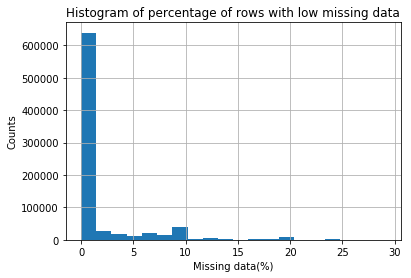

In [21]:
# Plotting the low missing data
no_missing_in_row_percent_low = azdias_clean1_low_missing.loc[:].isnull().sum(axis = 1).sort_values(ascending=False)/azdias_clean1_low_missing.shape[1]*100
no_missing_in_row_percent_low.hist(bins = 20)
plt.xlabel('Missing data(%)')
plt.ylabel('Counts')
plt.title('Histogram of percentage of rows with low missing data');

GFK_URLAUBERTYP
ONLINE_AFFINITAET
BALLRAUM
PRAEGENDE_JUGENDJAHRE
ZABEOTYP


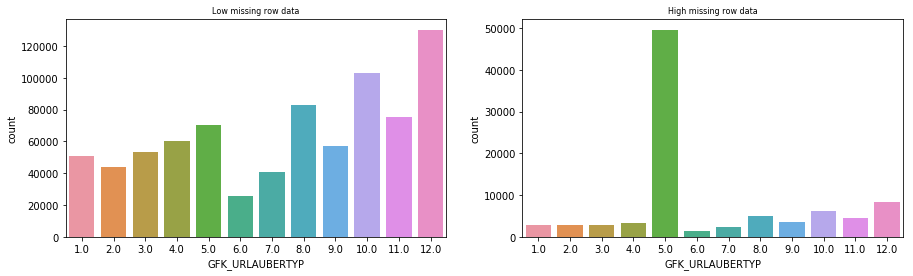

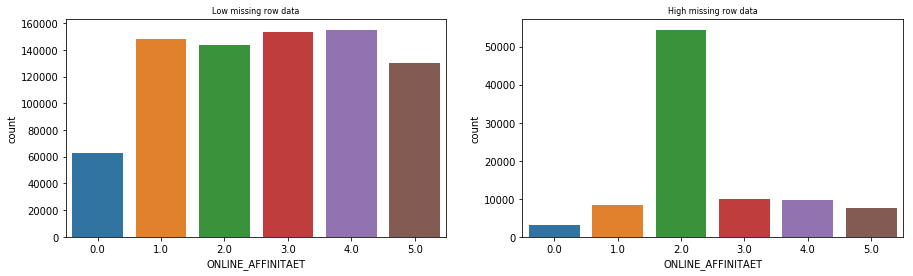

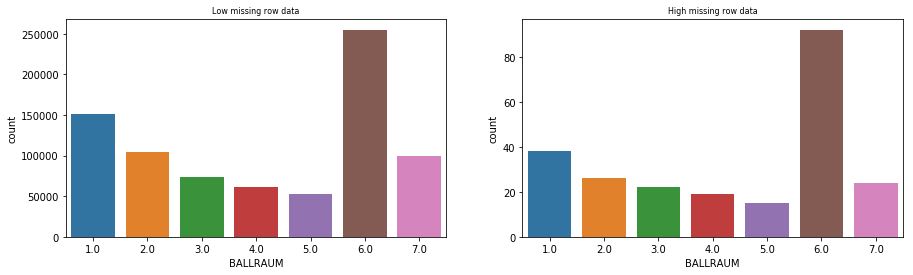

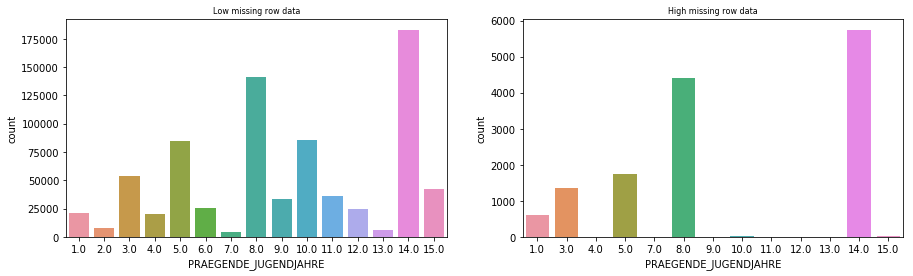

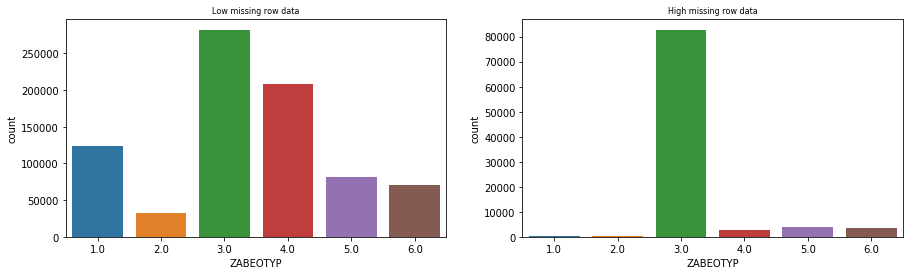

In [22]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
def compare_columns(column):
    fontsize = 8
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(15)
    ax1.set_title('Low missing row data', fontsize=fontsize)
    sns.countplot(x=column, data=azdias_clean1_low_missing, ax = ax1)
    
    ax2.set_title('High missing row data', fontsize=fontsize)
    sns.countplot(x=column, data=azdias_clean1_high_missing,ax = ax2)

random.seed(1)
for col in random.choices(azdias_clean1.columns, k =5):
    compare_columns(col)
    print(col)

In [23]:
# Calculate the mean value of each columns for both data sets of low and high row missing values and see how the ratio changes
azdias_clean1_low_missing_mean = azdias_clean1_low_missing.mean()
azdias_clean1_high_missing_mean = azdias_clean1_high_missing.mean()
mean_ratio =  azdias_clean1_low_missing_mean / azdias_clean1_high_missing_mean

In [24]:
# Let's sort this mean ratio and have a look at the data
mean_ratio.sort_values(inplace=True,ascending=False)

mean_ratio

PLZ8_ANTG4                      inf
PLZ8_ANTG3                      inf
GREEN_AVANTGARDE         732.363908
W_KEIT_KIND_HH             2.354894
SEMIO_VERT                 2.303473
HH_EINKOMMEN_SCORE         2.196078
PLZ8_BAUMAX                1.943914
ANZ_HAUSHALTE_AKTIV        1.870260
SEMIO_SOZ                  1.810632
ANZ_HH_TITEL               1.512171
GEBAEUDETYP                1.474425
WOHNLAGE                   1.455948
SEMIO_ERL                  1.410084
PLZ8_ANTG2                 1.400929
SEMIO_KULT                 1.328401
VERS_TYP                   1.224396
HEALTH_TYP                 1.202749
SEMIO_TRADV                1.190913
GFK_URLAUBERTYP            1.181877
ALTERSKATEGORIE_GROB       1.149523
FINANZ_HAUSBAUER           1.137133
ONLINE_AFFINITAET          1.135394
EWDICHTE                   1.125515
LP_STATUS_GROB             1.120070
ARBEIT                     1.101280
FINANZ_VORSORGER           1.097056
RELAT_AB                   1.087489
ORTSGR_KLS9                1

- From the columns mean ratios we calculated above, it looks like there are 3 columns, namely 'PLZ8_ANTG4' , 'PLZ8_ANTG3' and 'GREEN_AVANTGARDE' that have very high ratio. This means that these columns have a very small mean value in the data set with high missing values which could indicate that all or majority of the values on these 3 columns are Null in the dataset with high missing values. This is somewhat justifiebale as we expt this subset of data will be missing lots of data
- On the opposite end, there are 6 columns that exhibits very low ratio, meaning the mean value of these 6 columns ('KBA05_ANTG1','KBA05_ANTG2','KBA05_ANTG3','KBA05_ANTG4','KBA05_GBZ','MOBI_REGIO') in the subset of the data with no or a few missing data are small. This indicate perhaps these columns are special and have a unique behaviour

Let's quickly investigae some of these special columns to learn more about them.  

In [25]:
# Looking at KBA05_ANTG1 column values
azdias_clean1_low_missing.KBA05_ANTG1

1         0.0
2         1.0
3         4.0
4         1.0
5         2.0
6         3.0
7         2.0
8         1.0
9         1.0
10        0.0
12        NaN
13        NaN
15        0.0
16        3.0
18        2.0
19        1.0
20        1.0
21        1.0
22        1.0
23        4.0
25        1.0
26        NaN
27        2.0
28        1.0
29        4.0
31        0.0
32        4.0
33        1.0
34        3.0
36        0.0
         ... 
891191    3.0
891192    0.0
891193    1.0
891194    4.0
891195    0.0
891196    0.0
891197    3.0
891198    1.0
891199    0.0
891200    1.0
891201    1.0
891202    0.0
891203    NaN
891204    3.0
891205    1.0
891206    4.0
891207    4.0
891208    3.0
891209    0.0
891210    0.0
891211    0.0
891212    0.0
891213    2.0
891214    1.0
891215    0.0
891216    2.0
891217    0.0
891218    1.0
891219    0.0
891220    1.0
Name: KBA05_ANTG1, Length: 797837, dtype: float64

## Getting the discription of this column from Data_Dictionary.md

### 5.1. KBA05_ANTG1
Number of 1-2 family houses in the microcell
- -1: unknown
-  0: no 1-2 family homes
-  1: lower share of 1-2 family homes
-  2: average share of 1-2 family homes
-  3: high share of 1-2 family homes
-  4: very high share of 1-2 family homes

Based on the desctiption provided, it means the number 0 actually means something and it is not a missing data so calculating the mean value and comparing them is not the correct approach to make the judgment. 

It is probably best to judge the data based on the [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) graphs we did above.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


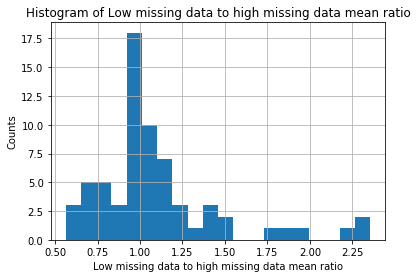

In [26]:
# Eventhough we are not using the mean ratio, it is interesting to look at the ratio distribution in a histogram so let's do that here
mean_ratio_cleaned = mean_ratio[mean_ratio.values < 3.0]
mean_ratio_cleaned.hist(bins = 20)
plt.xlabel('Low missing data to high missing data mean ratio')
plt.ylabel('Counts')
plt.title('Histogram of Low missing data to high missing data mean ratio');

Based on the above histogram, it looks like the mean ratio is mostly around 1.0 as expected, although it could vary between 0.5 to 2.25 which is interesting

#### Discussion 1.1.3: Assess Missing Data in Each Row

Going back to the countplot() graphs we did above, we can conclude 

* The count values on Y-axis are in different scal which is expected as we didn't evenly split the data to two equal size subsets
* From the 5 randomly selected columns, only one of them exhibits similar pattern ('BALLRAUM') and the rest of them show a very different pattern between the two subsets. Let's examin one of them
* Looking at the pattern for GFK_URLAUBERTYP, the data with lots of missing data shows the number 5 has the highest frequency however the graph for the data with a few missing values shows number 12 is the maxium. 

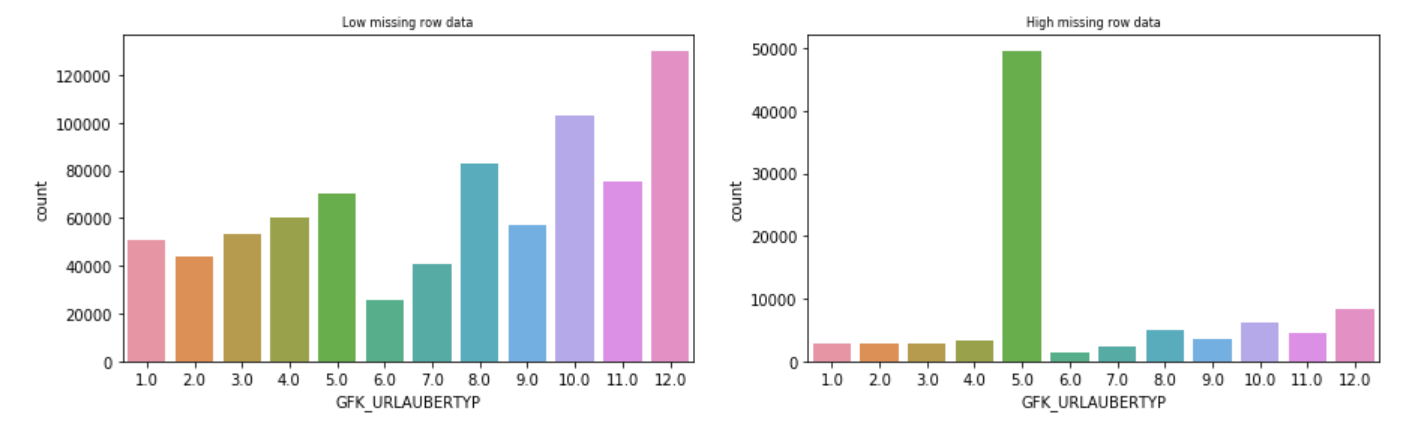

Here is the description for this column
### 1.8. GFK_URLAUBERTYP
Vacation habits
-  1: Event travelers
-  2: Family-oriented vacationists
-  3: Winter sportspeople
-  4: Culture lovers
-  5: Nature fans
-  6: Hiker
-  7: Golden ager
-  8: Homeland-connected vacationists
-  9: Package tour travelers
- 10: Connoisseurs
- 11: Active families
- 12: Without vacation

Based on this, it looks like the **nature fans** are dominant in the subset with lots of missing data, however the subset with a few missing data shows that group called as **without vacation** are the dominant group

Based on this quick assessment, it appears the best approach is to ignore the subset with lots of missing data and only use the subset with a few missing data for the subsequent analyses. We would still need to think about how to deal with the a few missing data on this subset which we plan next

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [27]:
# How many features are there of each data type?
feat_info.groupby(['type']).count()['attribute']

type
categorical    21
interval        1
mixed           7
numeric         7
ordinal        49
Name: attribute, dtype: int64

In [28]:
feat_info.head(10)


attribute information_level         type missing_or_unknown
0               AGER_TYP            person  categorical            [-1, 0]
1   ALTERSKATEGORIE_GROB            person      ordinal         [-1, 0, 9]
2              ANREDE_KZ            person  categorical            [-1, 0]
3          CJT_GESAMTTYP            person  categorical                [0]
4      FINANZ_MINIMALIST            person      ordinal               [-1]
5          FINANZ_SPARER            person      ordinal               [-1]
6       FINANZ_VORSORGER            person      ordinal               [-1]
7         FINANZ_ANLEGER            person      ordinal               [-1]
8  FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9       FINANZ_HAUSBAUER            person      ordinal               [-1]

In [29]:
azdias_clean1_low_missing.head(10)

ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
1                    1.0        2.0            5.0                1.0   
2                    3.0        2.0            3.0                1.0   
3                    4.0        2.0            2.0                4.0   
4                    3.0        1.0            5.0                4.0   
5                    1.0        2.0            2.0                3.0   
6                    2.0        2.0            5.0                1.0   
7                    1.0        1.0            3.0                3.0   
8                    3.0        1.0            3.0                4.0   
9                    3.0        2.0            4.0                2.0   
10                   3.0        2.0            1.0                2.0   

    FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  \
1             5.0               2.0             5.0                    4.0   
2             4.0               1.0             2.0                    3.0   
3             2.0               5.0             2.0                    1.0   
4             3.0               4.0             1.0                    3.0   
5             1.0               5.0             2.0                    2.0   
6             5.0               1.0             5.0                    4.0   
7             3.0               4.0             1.0                    3.0   
8             4.0               2.0             4.0                    2.0   
9             4.0               2.0             3.0                    5.0   
10            2.0               5.0             3.0                    1.0   

    FINANZ_HAUSBAUER  FINANZTYP    ...     PLZ8_ANTG1  PLZ8_ANTG2  PLZ8_ANTG3  \
1                5.0        1.0    ...            2.0         3.0         2.0   
2                5.0        1.0    ...            3.0         3.0         1.0   
3                2.0        6.0    ...            2.0         2.0         2.0   
4                2.0        5.0    ...            2.0         4.0         2.0   
5                5.0        2.0    ...            2.0         3.0         1.0   
6                3.0        4.0    ...            3.0         3.0         1.0   
7                2.0        5.0    ...            3.0         3.0         1.0   
8                2.0        6.0    ...            2.0         3.0         2.0   
9                4.0        1.0    ...            2.0         3.0         2.0   
10               5.0        6.0    ...            2.0         4.0         2.0   

    PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  ORTSGR_KLS9  RELAT_AB  
1          1.0          1.0       5.0       4.0     3.0          5.0       4.0  
2          0.0          1.0       4.0       4.0     3.0          5.0       2.0  
3          0.0          1.0       3.0       4.0     2.0          3.0       3.0  
4          1.0          2.0       3.0       3.0     4.0          6.0       5.0  
5          1.0          1.0       5.0       5.0     2.0          3.0       3.0  
6          0.0          1.0       5.0       5.0     4.0          6.0       3.0  
7          0.0          1.0       4.0       4.0     2.0          5.0       2.0  
8          1.0          1.0       3.0       3.0     2.0          4.0       3.0  
9          1.0          1.0       3.0       3.0     2.0          3.0       1.0  
10         0.0          2.0       3.0       3.0     4.0          6.0       5.0  

[10 rows x 79 columns]

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [30]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
cat = feat_info['attribute'][feat_info['type'] == 'categorical'].tolist()
cat_clean = set(cat).intersection(azdias_clean1_low_missing.columns.tolist())

for cats in cat_clean:
    cat_count = azdias_clean1_low_missing.pivot_table(columns=cats, aggfunc='size')
    print (cat_count)

GEBAEUDETYP
1.0    460328
2.0      4893
3.0    178627
4.0       896
5.0         1
6.0       624
8.0    152468
dtype: int64
GREEN_AVANTGARDE
0    622640
1    175197
dtype: int64
CJT_GESAMTTYP
1.0     93301
2.0    141253
3.0    147191
4.0    198266
5.0    111095
6.0    102065
dtype: int64
ANREDE_KZ
1.0    381784
2.0    416053
dtype: int64
ZABEOTYP
1.0    123397
2.0     32986
3.0    282142
4.0    207504
5.0     80951
6.0     70857
dtype: int64
SHOPPER_TYP
0.0    127122
1.0    247351
2.0    205922
3.0    180798
dtype: int64
LP_FAMILIE_FEIN
1.0     402524
2.0      98547
3.0       4688
4.0      11574
5.0      11167
6.0       8526
7.0      19575
8.0      21780
9.0      10452
10.0    128962
11.0     48744
dtype: int64
FINANZTYP
1.0    197088
2.0    104737
3.0     44741
4.0     55915
5.0    106315
6.0    289041
dtype: int64
GFK_URLAUBERTYP
1.0      50654
2.0      43816
3.0      53101
4.0      60421
5.0      70497
6.0      25737
7.0      40678
8.0      83026
9.0      57121
10.0    102818
11.0   

In [31]:
for cats in cat_clean:
    azdias_clean1_low_missing[cats] = azdias_clean1_low_missing[cats].astype("category")

    print(cats,' : ', azdias_clean1_low_missing[cats].cat.categories)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


GEBAEUDETYP  :  Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0], dtype='float64')
GREEN_AVANTGARDE  :  Int64Index([0, 1], dtype='int64')
CJT_GESAMTTYP  :  Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype='float64')
ANREDE_KZ  :  Float64Index([1.0, 2.0], dtype='float64')
ZABEOTYP  :  Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype='float64')
SHOPPER_TYP  :  Float64Index([0.0, 1.0, 2.0, 3.0], dtype='float64')
LP_FAMILIE_FEIN  :  Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0], dtype='float64')
FINANZTYP  :  Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype='float64')
GFK_URLAUBERTYP  :  Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0], dtype='float64')
NATIONALITAET_KZ  :  Float64Index([1.0, 2.0, 3.0], dtype='float64')
LP_FAMILIE_GROB  :  Float64Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64')
VERS_TYP  :  Float64Index([1.0, 2.0], dtype='float64')
OST_WEST_KZ  :  Index(['O', 'W'], dtype='object')
SOHO_KZ  :  Float64Index([0.0, 1.

### Based on above, it looks like:

- Multi-level categoricals (three or more values) are:

* LP_STATUS_FEIN  
* SHOPPER_TYP  
* CJT_GESAMTTYP  
* CAMEO_DEUG_2015  
* CAMEO_DEU_2015  
* NATIONALITAET_KZ
* LP_STATUS_GROB  
* ZABEOTYP  
* FINANZTYP  
* LP_FAMILIE_GROB  
* GFK_URLAUBERTYP  
* LP_FAMILIE_FEIN  
* GEBAEUDETYP  


- Binary (two-level) categoricals that take numeric values are:

* ANREDE_KZ  
* GREEN_AVANTGARDE
* VERS_TYP  
* SOHO_KZ  

- One binary variable that takes on non-numeric values is:

OST_WEST_KZ  

In [32]:
# Re-encode categorical variable(s) to be kept in the analysis.

# Converting 'OST_WEST_KZ' from non-numeric to numeric 
azdias_clean1_low_missing['OST_WEST_KZ'].replace(['O', 'W'], [0, 1], inplace=True)
azdias_clean1_low_missing['VERS_TYP'].replace([1.0, 2.0], [0, 1], inplace=True)
azdias_clean1_low_missing['ANREDE_KZ'].replace([1.0, 2.0], [0, 1], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
# Split categorical variables to binary or multi subsection programmatically
cat_bin = []
cat_multi = []

for cat in cat_clean:
    if azdias_clean1_low_missing[cat].nunique() > 2:
        cat_multi.append(cat)
    else:
        cat_bin.append(cat)
        
print(cat_multi)
print(cat_bin)

['GEBAEUDETYP', 'CJT_GESAMTTYP', 'ZABEOTYP', 'SHOPPER_TYP', 'LP_FAMILIE_FEIN', 'FINANZTYP', 'GFK_URLAUBERTYP', 'NATIONALITAET_KZ', 'LP_FAMILIE_GROB', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'LP_STATUS_GROB', 'LP_STATUS_FEIN']
['GREEN_AVANTGARDE', 'ANREDE_KZ', 'VERS_TYP', 'OST_WEST_KZ', 'SOHO_KZ']


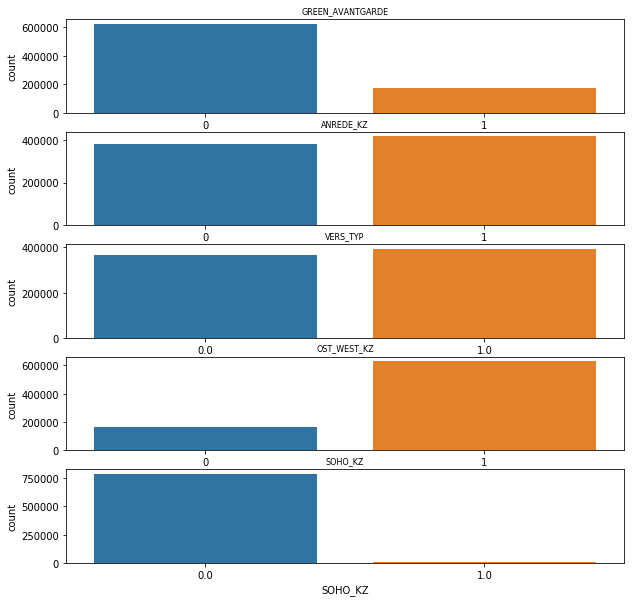

In [34]:
# Let's double check all the binary columns are encoded correctly by plotting them

nrows = len(cat_bin)
fig, axes = plt.subplots(nrows=nrows, figsize=(10, 10))

for i, j in zip(cat_bin, range(len(cat_bin))):
    ax = axes[j]
    ax.set_title(i, fontsize=8)
    sns.countplot(x=i, data = azdias_clean1_low_missing, ax = ax)

In [35]:
# Checking the shape of the dataframe before creating dummt variable
azdias_clean1_low_missing.shape

(797837, 79)

In [36]:
# Creating dummy variables for the multi level categorial features
azdias_clean1_low_missing = pd.get_dummies(azdias_clean1_low_missing, columns=cat_multi)

In [37]:
# Let check the converted data frame
azdias_clean1_low_missing.T

1      2      3      4      5      6      7      8       \
ALTERSKATEGORIE_GROB       1      3      4      3      1      2      1      3   
ANREDE_KZ                  1      1      1      0      1      1      0      0   
FINANZ_MINIMALIST          1      1      4      4      3      1      3      4   
FINANZ_SPARER              5      4      2      3      1      5      3      4   
FINANZ_VORSORGER           2      1      5      4      5      1      4      2   
FINANZ_ANLEGER             5      2      2      1      2      5      1      4   
FINANZ_UNAUFFAELLIGER      4      3      1      3      2      4      3      2   
FINANZ_HAUSBAUER           5      5      2      2      5      3      2      2   
GREEN_AVANTGARDE           0      1      0      0      0      0      0      1   
HEALTH_TYP                 3      3      2      3      3      2      1      3   
LP_LEBENSPHASE_FEIN       21      3    NaN     32      8      2      5     10   
LP_LEBENSPHASE_GROB        6      1    NaN     10      2      1      2      3   
PRAEGENDE_JUGENDJAHRE     14     15      8      8      3     10      8     11   
RETOURTYP_BK_S             1      3      2      5      3      4      5      4   
SEMIO_SOZ                  5      4      5      6      2      2      7      4   
SEMIO_FAM                  4      1      1      4      4      5      7      5   
SEMIO_REL                  4      3      2      4      7      5      7      4   
SEMIO_MAT                  3      3      1      2      4      7      5      1   
SEMIO_VERT                 1      4      4      7      2      2      6      5   
SEMIO_LUST                 2      4      4      4      2      6      2      6   
SEMIO_ERL                  2      6      7      4      2      5      2      4   
SEMIO_KULT                 3      3      4      6      5      5      7      5   
SEMIO_RAT                  6      4      3      2      7      7      5      2   
SEMIO_KRIT                 4      7      4      3      4      7      1      5   
SEMIO_DOM                  7      7      4      2      4      4      1      5   
SEMIO_KAEM                 4      7      5      2      4      7      2      3   
SEMIO_PFLICHT              7      3      4      4      7      7      5      1   
SEMIO_TRADV                6      3      4      2      6      7      5      4   
SOHO_KZ                    1      0      0      0      0      0      0      0   
VERS_TYP                   1      0      0      1      1      0      0      1   
...                      ...    ...    ...    ...    ...    ...    ...    ...   
CAMEO_DEU_2015_6F          0      0      0      0      0      0      0      0   
CAMEO_DEU_2015_7A          0      0      0      0      0      0      0      0   
CAMEO_DEU_2015_7B          0      0      0      0      0      0      0      0   
CAMEO_DEU_2015_7C          0      0      0      0      0      0      0      0   
CAMEO_DEU_2015_7D          0      0      0      0      0      0      0      0   
CAMEO_DEU_2015_7E          0      0      0      0      0      0      0      0   
CAMEO_DEU_2015_8A          1      0      0      0      0      0      0      0   
CAMEO_DEU_2015_8B          0      0      0      0      0      0      0      0   
CAMEO_DEU_2015_8C          0      0      0      0      1      0      0      0   
CAMEO_DEU_2015_8D          0      0      0      0      0      0      0      0   
CAMEO_DEU_2015_9A          0      0      0      0      0      0      0      0   
CAMEO_DEU_2015_9B          0      0      0      0      0      0      0      0   
CAMEO_DEU_2015_9C          0      0      0      0      0      0      0      0   
CAMEO_DEU_2015_9D          0      0      0      0      0      0      0      0   
CAMEO_DEU_2015_9E          0      0      0      0      0      0      0      0   
LP_STATUS_GROB_1.0         1      0      0      0      0      1      1      0   
LP_STATUS_GROB_2.0         0      1      0      1      1      0      0      0   
LP_STATUS_GROB_3.0         0      0      0      0    

In [38]:
print(azdias_clean1_low_missing.shape)

(797837, 194)


#### Discussion 1.2.1: Re-Encode Categorical Features

* Discovered 5 categorial features are binary type. Their value were turned into 0 and 1 for consistency
* There are 13 categorial feature with Multi-level categoricals (three or more values)
* After creating the dummy variables for multi level categories the number of columns are increased from 79 to 194

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

Let's investigate "PRAEGENDE_JUGENDJAHRE" by looking at `Data_Dictionary.md`

### 1.18. PRAEGENDE_JUGENDJAHRE
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

In [39]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

# First we create the new binary variable called "PRAEGENDE_JUGENDJAHRE_Movement" to capture movement
azdias_clean1_low_missing = azdias_clean1_low_missing.assign(PRAEGENDE_JUGENDJAHRE_Movement=azdias_clean1_low_missing['PRAEGENDE_JUGENDJAHRE']) 

for i in range(1,azdias_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'].nunique()+1):
    if (i % 2 == 0):
        azdias_clean1_low_missing.loc[azdias_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_Movement'] = 0 
    else:
        azdias_clean1_low_missing.loc[azdias_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_Movement'] = 1 

# Second we create another new interval type variable called "PRAEGENDE_JUGENDJAHRE_decade" to capture decades
azdias_clean1_low_missing = azdias_clean1_low_missing.assign(PRAEGENDE_JUGENDJAHRE_decade=azdias_clean1_low_missing['PRAEGENDE_JUGENDJAHRE']) 

for i in range(1,azdias_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'].nunique()+1):
    if (i == 1 or i == 2):
        azdias_clean1_low_missing.loc[azdias_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_decade'] = 1 
    if (i == 3 or i == 4):
        azdias_clean1_low_missing.loc[azdias_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_decade'] = 2 
    if (i == 5 or i == 6 or i ==7):
        azdias_clean1_low_missing.loc[azdias_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_decade'] = 3 
    if (i == 8 or i == 9):
        azdias_clean1_low_missing.loc[azdias_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_decade'] = 4 
    if (i == 14 or i == 15):
        azdias_clean1_low_missing.loc[azdias_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_decade'] = 6 
    elif (i == 10 or i == 11 or i == 12 or i == 13):
        azdias_clean1_low_missing.loc[azdias_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_decade'] = 5 

# Testing what we did is correct
azdias_clean1_low_missing[['PRAEGENDE_JUGENDJAHRE','PRAEGENDE_JUGENDJAHRE_Movement','PRAEGENDE_JUGENDJAHRE_decade']].head()

PRAEGENDE_JUGENDJAHRE  PRAEGENDE_JUGENDJAHRE_Movement  \
1                   14.0                             0.0   
2                   15.0                             1.0   
3                    8.0                             0.0   
4                    8.0                             0.0   
5                    3.0                             1.0   

   PRAEGENDE_JUGENDJAHRE_decade  
1                           6.0  
2                           6.0  
3                           4.0  
4                           4.0  
5                           2.0

Above operation seems to have been done correctly

Let's now look at CAMEO_INTL_2015

### 4.3. CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown


Since "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. The idea is to break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).


In [40]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
azdias_clean1_low_missing = azdias_clean1_low_missing.assign(CAMEO_INTL_2015_wealth=azdias_clean1_low_missing['CAMEO_INTL_2015']) 
azdias_clean1_low_missing = azdias_clean1_low_missing.assign(CAMEO_INTL_2015_life_stage=azdias_clean1_low_missing['CAMEO_INTL_2015']) 

azdias_clean1_low_missing['CAMEO_INTL_2015_wealth'] = (azdias_clean1_low_missing['CAMEO_INTL_2015_wealth'].astype(float)/10).round()
azdias_clean1_low_missing['CAMEO_INTL_2015_life_stage'] = azdias_clean1_low_missing['CAMEO_INTL_2015_life_stage'].astype(float)%10

# Testing what we did is correct
azdias_clean1_low_missing[['CAMEO_INTL_2015','CAMEO_INTL_2015_wealth','CAMEO_INTL_2015_life_stage']].head()

CAMEO_INTL_2015  CAMEO_INTL_2015_wealth  CAMEO_INTL_2015_life_stage
1              51                     5.0                         1.0
2              24                     2.0                         4.0
3              12                     1.0                         2.0
4              43                     4.0                         3.0
5              54                     5.0                         4.0

In [41]:
# Let's have a look at the other mixed type features aside "CAMEO_INTL_2015" and "PRAEGENDE_JUGENDJAHRE"
feat_info[feat_info['type'] == 'mixed']

attribute information_level   type missing_or_unknown
15    LP_LEBENSPHASE_FEIN            person  mixed                [0]
16    LP_LEBENSPHASE_GROB            person  mixed                [0]
22  PRAEGENDE_JUGENDJAHRE            person  mixed            [-1, 0]
56               WOHNLAGE          building  mixed               [-1]
59        CAMEO_INTL_2015     microcell_rr4  mixed           [-1, XX]
64           KBA05_BAUMAX     microcell_rr3  mixed            [-1, 0]
79            PLZ8_BAUMAX    macrocell_plz8  mixed            [-1, 0]

Having a quick look at `LP_LEBENSPHASE_FEIN` , `LP_LEBENSPHASE_GROB` , `WOHNLAGE` and `KBA05_BAUMAX` in `Data_Dictionary.md` shows that these features could stay as they are as they seem to be regular ordinal features so we won't touch them for now and use them as they are

#### Discussion 1.2.2: Engineer Mixed-Type Features

 - For the mixed value features, we engineered two of them ("CAMEO_INTL_2015" and "PRAEGENDE_JUGENDJAHRE") as described above
 - The remaining 5 mixed value features were kept as they were since looking at the features description in `Data_Dictionary.md` suggested they look fine

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [42]:
# We will dtop the two "CAMEO_INTL_2015" and "PRAEGENDE_JUGENDJAHRE" columns since we created new columns based on the data in these 
col_to_drop = ['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE']

azdias_clean1_low_missing.drop(col_to_drop, axis=1, inplace = True)

cleaned dataframe shape :  (797837, 196)


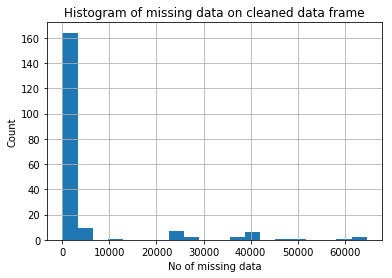

In [43]:
# Some statistic on the cleaned dataframe
print('cleaned dataframe shape : ',azdias_clean1_low_missing.shape)

azdias_clean1_low_missing.isna().sum().hist(bins = 20)
plt.xlabel('No of missing data')
plt.ylabel('Count')
plt.title('Histogram of missing data on cleaned data frame');

In [44]:
# listing and sorting the missing data count
azdias_clean1_low_missing.isna().sum().sort_values(ascending=False)

REGIOTYP                          64718
KKK                               64718
W_KEIT_KIND_HH                    59177
LP_LEBENSPHASE_FEIN               50010
LP_LEBENSPHASE_GROB               47130
KBA05_GBZ                         39940
KBA05_ANTG2                       39940
MOBI_REGIO                        39940
KBA05_ANTG4                       39940
KBA05_ANTG3                       39940
KBA05_ANTG1                       39940
VERS_TYP                          36644
HEALTH_TYP                        36644
PRAEGENDE_JUGENDJAHRE_Movement    28673
PRAEGENDE_JUGENDJAHRE_decade      28673
PLZ8_HHZ                          23132
PLZ8_ANTG3                        23132
PLZ8_GBZ                          23132
PLZ8_BAUMAX                       23132
PLZ8_ANTG4                        23132
PLZ8_ANTG1                        23132
PLZ8_ANTG2                        23132
KBA13_ANZAHL_PKW                  12474
ANZ_HAUSHALTE_AKTIV                6413
CAMEO_INTL_2015_life_stage         6069


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [45]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep = ';')
    feat_info['missing_or_unknown'] = feat_info['missing_or_unknown'].str.replace(']','').str.replace('[','').str.split(',')

    for col, missing_values in zip(feat_info['attribute'], feat_info['missing_or_unknown']):
        if missing_values[0] != '':
            for value in missing_values:
                if value.isnumeric() or value.lstrip('-').isnumeric():
                    value = int(value)
                    
                df.loc[df[col] == value, col] = np.nan
                
    # remove selected columns and rows, ...
    col_to_drop = ['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH']
    df_clean1 = df.drop(columns = col_to_drop)
    
    threshold = 0.3
    df_clean1_low_missing = df_clean1[df_clean1.loc[:].isnull().sum(axis = 1)/df_clean1.shape[1] < threshold ]

    
    # select, re-encode, and engineer column values.
    df_clean1_low_missing['OST_WEST_KZ'].replace(['O', 'W'], [0, 1], inplace=True)
    df_clean1_low_missing['VERS_TYP'].replace([1.0, 2.0], [0, 1], inplace=True)
    df_clean1_low_missing['ANREDE_KZ'].replace([1.0, 2.0], [0, 1], inplace=True)
    
    cat_multi = ['LP_STATUS_GROB', 'GFK_URLAUBERTYP', 'CJT_GESAMTTYP', 'NATIONALITAET_KZ', 
                 'GEBAEUDETYP', 'CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'LP_FAMILIE_FEIN', 
                 'FINANZTYP', 'ZABEOTYP', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'SHOPPER_TYP']
    
    df_clean1_low_missing = pd.get_dummies(df_clean1_low_missing, columns=cat_multi)

    # First we create the new binary variable called "PRAEGENDE_JUGENDJAHRE_Movement" to capture movement
    df_clean1_low_missing = df_clean1_low_missing.assign(PRAEGENDE_JUGENDJAHRE_Movement=df_clean1_low_missing['PRAEGENDE_JUGENDJAHRE']) 

    for i in range(1,df_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'].nunique()+1):
        if (i % 2 == 0):
            df_clean1_low_missing.loc[df_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_Movement'] = 0 
        else:
            df_clean1_low_missing.loc[df_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_Movement'] = 1 

    # Second we create another new interval type variable called "PRAEGENDE_JUGENDJAHRE_decade" to capture decades
    df_clean1_low_missing = df_clean1_low_missing.assign(PRAEGENDE_JUGENDJAHRE_decade=df_clean1_low_missing['PRAEGENDE_JUGENDJAHRE']) 

    for i in range(1,df_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'].nunique()+1):
        if (i == 1 or i == 2):
            df_clean1_low_missing.loc[df_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_decade'] = 1 
        if (i == 3 or i == 4):
            df_clean1_low_missing.loc[df_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_decade'] = 2 
        if (i == 5 or i == 6 or i ==7):
            df_clean1_low_missing.loc[df_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_decade'] = 3 
        if (i == 8 or i == 9):
            df_clean1_low_missing.loc[df_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_decade'] = 4 
        if (i == 14 or i == 15):
            df_clean1_low_missing.loc[df_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_decade'] = 6 
        elif (i == 10 or i == 11 or i == 12 or i == 13):
            df_clean1_low_missing.loc[df_clean1_low_missing['PRAEGENDE_JUGENDJAHRE'] == i, 'PRAEGENDE_JUGENDJAHRE_decade'] = 5 

    df_clean1_low_missing = df_clean1_low_missing.assign(CAMEO_INTL_2015_wealth=df_clean1_low_missing['CAMEO_INTL_2015']) 
    df_clean1_low_missing = df_clean1_low_missing.assign(CAMEO_INTL_2015_life_stage=df_clean1_low_missing['CAMEO_INTL_2015']) 

    df_clean1_low_missing['CAMEO_INTL_2015_wealth'] = (df_clean1_low_missing['CAMEO_INTL_2015_wealth'].astype(float)/10).round()
    df_clean1_low_missing['CAMEO_INTL_2015_life_stage'] = df_clean1_low_missing['CAMEO_INTL_2015_life_stage'].astype(float)%10

    # Drop unnecessary columns
    col_to_drop = ['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE']
    df_clean1_low_missing.drop(col_to_drop, axis=1, inplace = True)
    
    # Return the cleaned dataframe.
    return df_clean1_low_missing

In [46]:
# Test the function
azdias_clean1_low_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797837 entries, 1 to 891220
Columns: 196 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_life_stage
dtypes: category(2), float64(64), int64(2), uint8(128)
memory usage: 506.7 MB


In [47]:
azdias_test = clean_data(azdias)
azdias_test.info()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 797837 entries, 1 to 891220
Columns: 196 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_life_stage
dtypes: float64(66), int64(2), uint8(128)
memory usage: 517.4 MB


Looks like the function more or less is working. The only exception is that the main code returns 2x categorial variables and 64x float64, however the function return 66x float64.

Furthur investigation showed `GREEN_AVANTGARDE` and `SOHO_KZ` were turned into categorial type in the main code somewhere so we go ahead and manually change these two columns to float64 so everything is consistent


In [48]:
# Manually changing the two featured back to float64 from category for consistency
azdias_clean1_low_missing['GREEN_AVANTGARDE'] = azdias_clean1_low_missing['GREEN_AVANTGARDE'].astype(float)
azdias_clean1_low_missing['SOHO_KZ'] = azdias_clean1_low_missing['SOHO_KZ'].astype(float)

print(azdias_clean1_low_missing['GREEN_AVANTGARDE'].dtype)
print(azdias_clean1_low_missing['SOHO_KZ'].dtype)

float64
float64


In [49]:
azdias_clean1_low_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797837 entries, 1 to 891220
Columns: 196 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_life_stage
dtypes: float64(66), int64(2), uint8(128)
memory usage: 517.4 MB


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [50]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

# Get an idea for the percentage of the missing values for each column
missing_percent = azdias_clean1_low_missing.isna().sum().sort_values(ascending=False)/azdias_clean1_low_missing.shape[0] * 100
print(missing_percent)

plt.xlabel('Percentage of missing data')
plt.ylabel('Count')
plt.title('Histogram of missing data on cleaned data frame');
missing_percent.hist(bins = 20);

REGIOTYP                          8.111682
KKK                               8.111682
W_KEIT_KIND_HH                    7.417179
LP_LEBENSPHASE_FEIN               6.268198
LP_LEBENSPHASE_GROB               5.907222
KBA05_GBZ                         5.006035
KBA05_ANTG2                       5.006035
MOBI_REGIO                        5.006035
KBA05_ANTG4                       5.006035
KBA05_ANTG3                       5.006035
KBA05_ANTG1                       5.006035
VERS_TYP                          4.592918
HEALTH_TYP                        4.592918
PRAEGENDE_JUGENDJAHRE_Movement    3.593842
PRAEGENDE_JUGENDJAHRE_decade      3.593842
PLZ8_HHZ                          2.899339
PLZ8_ANTG3                        2.899339
PLZ8_GBZ                          2.899339
PLZ8_BAUMAX                       2.899339
PLZ8_ANTG4                        2.899339
PLZ8_ANTG1                        2.899339
PLZ8_ANTG2                        2.899339
KBA13_ANZAHL_PKW                  1.563477
ANZ_HAUSHAL

It looks the percentage of the missing values for the columns are not very significant. it maxes at 8.1% and drops rapidly

Based on above we could go ahead and remove all data points with missing data, or apply an Imputer to replace all missing values and both methods would be reasonable given the low missing data percentage.

We will go ahead and impute the data with median stragedy since a major part of the data are ordinal type.


In [51]:
# Impute the missing data
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = np.nan, strategy = 'median', axis = 0)

#azdias_clmi stands for azdias df cleaned, low missing values and imputed
azdias_clmi = pd.DataFrame(imputer.fit_transform(azdias_clean1_low_missing))
azdias_clmi.columns = azdias_clean1_low_missing.columns
azdias_clmi.index = azdias_clean1_low_missing.index

In [52]:
# Checking how the imputation did
missing_percent = azdias_clmi.isna().sum().sort_values(ascending=False)/azdias_clmi.shape[0] * 100
print(missing_percent)
print('Total no of missing values :',azdias_clmi.isna().sum().sum())

CAMEO_INTL_2015_life_stage    0.0
CJT_GESAMTTYP_2.0             0.0
GEBAEUDETYP_8.0               0.0
GEBAEUDETYP_6.0               0.0
GEBAEUDETYP_5.0               0.0
GEBAEUDETYP_4.0               0.0
GEBAEUDETYP_3.0               0.0
GEBAEUDETYP_2.0               0.0
GEBAEUDETYP_1.0               0.0
RELAT_AB                      0.0
ORTSGR_KLS9                   0.0
ARBEIT                        0.0
PLZ8_GBZ                      0.0
PLZ8_HHZ                      0.0
PLZ8_BAUMAX                   0.0
PLZ8_ANTG4                    0.0
PLZ8_ANTG3                    0.0
PLZ8_ANTG2                    0.0
PLZ8_ANTG1                    0.0
KBA13_ANZAHL_PKW              0.0
REGIOTYP                      0.0
ONLINE_AFFINITAET             0.0
MOBI_REGIO                    0.0
CJT_GESAMTTYP_1.0             0.0
CJT_GESAMTTYP_3.0             0.0
CAMEO_INTL_2015_wealth        0.0
CJT_GESAMTTYP_4.0             0.0
LP_FAMILIE_FEIN_9.0           0.0
LP_FAMILIE_FEIN_8.0           0.0
LP_FAMILIE_FEI

In [53]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data = azdias_clmi.values
data = scaler.fit_transform(data)

azdias_clmis = pd.DataFrame(data)

azdias_clmis.describe()

0             1             2             3             4    \
count  7.978370e+05  7.978370e+05  7.978370e+05  7.978370e+05  7.978370e+05   
mean   7.391867e-19  3.977359e-17 -3.127739e-17  5.951789e-17 -1.342292e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.766591e+00 -1.043916e+00 -1.494575e+00 -1.155464e+00 -1.766949e+00   
25%   -7.830341e-01 -1.043916e+00 -7.686517e-01 -1.155464e+00 -1.040685e+00   
50%    2.005226e-01  9.579317e-01 -4.272814e-02  1.912594e-01  4.118430e-01   
75%    1.184079e+00  9.579317e-01  6.831954e-01  8.646211e-01  1.138107e+00   
max    1.184079e+00  9.579317e-01  1.409119e+00  1.537983e+00  1.138107e+00   

                5             6             7             8             9    \
count  7.978370e+05  7.978370e+05  7.978370e+05  7.978370e+05  7.978370e+05   
mean  -4.217817e-17  5.111966e-17  7.516549e-17  2.003819e-18 -2.838744e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.249961e+00 -1.184772e+00 -1.501745e+00 -5.304505e-01 -1.610659e+00   
25%   -1.249961e+00 -1.184772e+00 -7.915240e-01 -5.304505e-01 -2.570899e-01   
50%    1.080512e-01 -4.701931e-01 -8.130308e-02 -5.304505e-01 -2.570899e-01   
75%    7.870572e-01  9.589645e-01  6.289178e-01 -5.304505e-01  1.096479e+00   
max    1.466063e+00  1.673543e+00  1.339139e+00  1.885190e+00  1.096479e+00   

           ...                186           187           188           189  \
count      ...       7.978370e+05  7.978370e+05  7.978370e+05  7.978370e+05   
mean       ...       4.239191e-18 -3.497778e-17 -2.083972e-17  9.007390e-17   
std        ...       1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min        ...      -1.892076e-01 -1.938390e-01 -1.080257e-01 -1.552232e-01   
25%        ...      -1.892076e-01 -1.938390e-01 -1.080257e-01 -1.552232e-01   
50%        ...      -1.892076e-01 -1.938390e-01 -1.080257e-01 -1.552232e-01   
75%        ...      -1.892076e-01 -1.938390e-01 -1.080257e-01 -1.552232e-01   
max        ...       5.285201e+00  5.158921e+00  9.257059e+00  6.442337e+00   

                190           191           192           193           194  \
count  7.978370e+05  7.978370e+05  7.978370e+05  7.978370e+05  7.978370e+05   
mean  -2.678884e-17 -4.104490e-17 -1.009034e-16 -1.004938e-16 -1.590053e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -4.539955e-01 -4.032104e-01 -7.369637e-01 -2.317915e+00 -1.574723e+00   
25%   -4.539955e-01 -4.032104e-01 -7.369637e-01 -9.215946e-01 -8.994869e-01   
50%   -4.539955e-01 -4.032104e-01 -7.369637e-01 -2.234342e-01  4.509846e-01   
75%   -4.539955e-01 -4.032104e-01  1.356919e+00  1.172887e+00  1.126220e+00   
max    2.202665e+00  2.480095e+00  1.356919e+00  1.172887e+00  1.801456e+00   

                195  
count  7.978370e+05  
mean   3.811710e-18  
std    1.000001e+00  
min   -1.266908e+00  
25%   -1.266908e+00  
50%    8.519300e-02  
75%    7.612436e-01  
max    1.437294e+00  

[8 rows x 196 columns]

In [54]:
azdias_clmis.head()

0         1         2         3         4         5         6    \
0 -1.766591  0.957932 -1.494575  1.537983 -1.040685  1.466063  0.958965   
1  0.200523  0.957932 -1.494575  0.864621 -1.766949 -0.570955  0.244386   
2  1.184079  0.957932  0.683195 -0.482102  1.138107 -0.570955 -1.184772   
3  0.200523 -1.043916  0.683195  0.191259  0.411843 -1.249961  0.244386   
4 -1.766591  0.957932 -0.042728 -1.155464  1.138107 -0.570955 -0.470193   

        7        8         9      ...          186       187       188  \
0  1.339139 -0.53045  1.096479    ...    -0.189208 -0.193839 -0.108026   
1  1.339139  1.88519  1.096479    ...    -0.189208 -0.193839 -0.108026   
2 -0.791524 -0.53045 -0.257090    ...    -0.189208 -0.193839 -0.108026   
3 -0.791524 -0.53045  1.096479    ...    -0.189208 -0.193839 -0.108026   
4  1.339139 -0.53045  1.096479    ...    -0.189208 -0.193839 -0.108026   

        189       190      191       192       193       194       195  
0 -0.155223 -0.453995 -0.40321 -0.736964  1.172887  1.126220 -1.266908  
1 -0.155223 -0.453995 -0.40321  1.356919  1.172887 -0.899487  0.761244  
2 -0.155223  2.202665 -0.40321 -0.736964 -0.223434 -1.574723 -0.590858  
3 -0.155223 -0.453995 -0.40321 -0.736964 -0.223434  0.450985  0.085193  
4 -0.155223 -0.453995 -0.40321  1.356919 -1.619755  1.126220  0.761244  

[5 rows x 196 columns]

In [55]:
# Remapping the columns names 
azdias_clmis = pd.DataFrame(azdias_clmis.values,columns=azdias_clmi.columns.tolist())
azdias_clmis.head()

ALTERSKATEGORIE_GROB  ANREDE_KZ  FINANZ_MINIMALIST  FINANZ_SPARER  \
0             -1.766591   0.957932          -1.494575       1.537983   
1              0.200523   0.957932          -1.494575       0.864621   
2              1.184079   0.957932           0.683195      -0.482102   
3              0.200523  -1.043916           0.683195       0.191259   
4             -1.766591   0.957932          -0.042728      -1.155464   

   FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  \
0         -1.040685        1.466063               0.958965          1.339139   
1         -1.766949       -0.570955               0.244386          1.339139   
2          1.138107       -0.570955              -1.184772         -0.791524   
3          0.411843       -1.249961               0.244386         -0.791524   
4          1.138107       -0.570955              -0.470193          1.339139   

   GREEN_AVANTGARDE  HEALTH_TYP             ...              \
0          -0.53045    1.096479             ...               
1           1.88519    1.096479             ...               
2          -0.53045   -0.257090             ...               
3          -0.53045    1.096479             ...               
4          -0.53045    1.096479             ...               

   LP_STATUS_FEIN_5.0  LP_STATUS_FEIN_6.0  LP_STATUS_FEIN_7.0  \
0           -0.189208           -0.193839           -0.108026   
1           -0.189208           -0.193839           -0.108026   
2           -0.189208           -0.193839           -0.108026   
3           -0.189208           -0.193839           -0.108026   
4           -0.189208           -0.193839           -0.108026   

   LP_STATUS_FEIN_8.0  LP_STATUS_FEIN_9.0  LP_STATUS_FEIN_10.0  \
0           -0.155223           -0.453995             -0.40321   
1           -0.155223           -0.453995             -0.40321   
2           -0.155223            2.202665             -0.40321   
3           -0.155223           -0.453995             -0.40321   
4           -0.155223           -0.453995             -0.40321   

   PRAEGENDE_JUGENDJAHRE_Movement  PRAEGENDE_JUGENDJAHRE_decade  \
0                       -0.736964                      1.172887   
1                        1.356919                      1.172887   
2                       -0.736964                     -0.223434   
3                       -0.736964                     -0.223434   
4                        1.356919                     -1.619755   

   CAMEO_INTL_2015_wealth  CAMEO_INTL_2015_life_stage  
0                1.126220                   -1.266908  
1               -0.899487                    0.761244  
2               -1.574723                   -0.590858  
3                0.450985                    0.085193  
4                1.126220                    0.761244  

[5 rows x 196 columns]

### Discussion 2.1: Apply Feature Scaling

* The data was scaled using standard scaler method and the result was saved in a new dataframe called `azdias_clmis`
* looking at the scaled dataframe it is confirmed that the new dataframe has the mean of 0 and standard deviation of 1 which is what we wanted

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [56]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca = PCA()
azdias_clmis_pca = pca.fit_transform(azdias_clmis)


In [57]:
# Investigate the variance accounted for by each principal component.
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
#    for i in range(num_components):
#        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
scree_plot(pca)

In [58]:
# Let's see how the components explain the variance commulatively
for i in np.arange(10, 190, 10):
    print('{} components explain {} % of variance.'.format(i, round(pca.explained_variance_ratio_[:i].sum()*100),2))

10 components explain 30.0 % of variance.
20 components explain 41.0 % of variance.
30 components explain 49.0 % of variance.
40 components explain 56.0 % of variance.
50 components explain 62.0 % of variance.
60 components explain 67.0 % of variance.
70 components explain 72.0 % of variance.
80 components explain 77.0 % of variance.
90 components explain 82.0 % of variance.
100 components explain 87.0 % of variance.
110 components explain 91.0 % of variance.
120 components explain 94.0 % of variance.
130 components explain 97.0 % of variance.
140 components explain 98.0 % of variance.
150 components explain 99.0 % of variance.
160 components explain 100.0 % of variance.
170 components explain 100.0 % of variance.
180 components explain 100.0 % of variance.


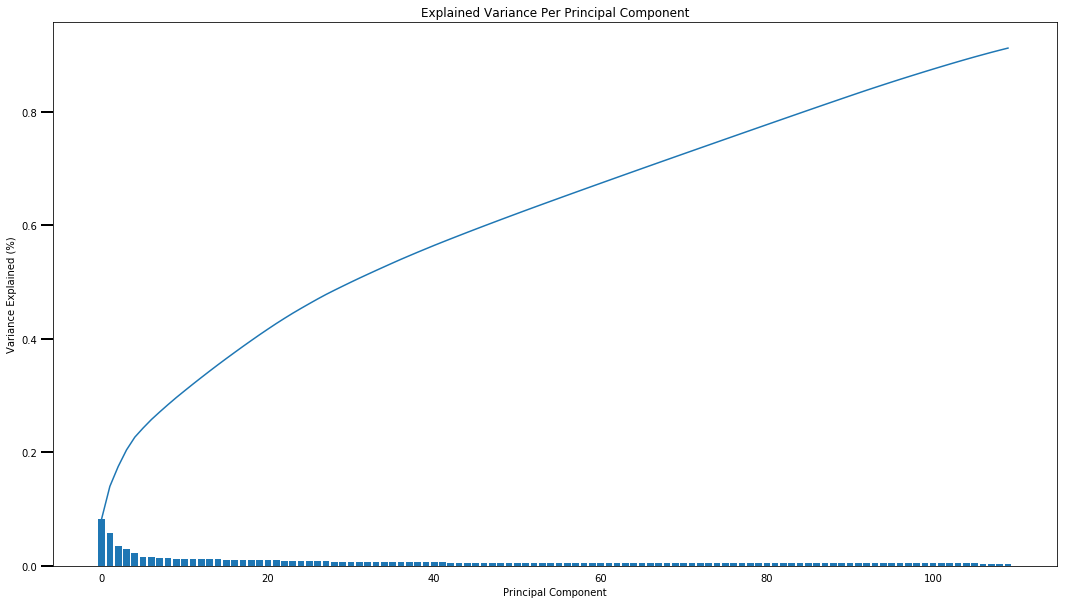

In [59]:
# Re-apply PCA to the data while selecting for number of components to retain.

# Apply PCA to the data.
pca = PCA(n_components=110)
azdias_clmis_pca = pca.fit_transform(azdias_clmis)

scree_plot(pca)

### Discussion 2.2: Perform Dimensionality Reduction

* Based on above plot, it looks around 110 principal components is where we reatin 91% of variance so we choose the number of components to be 110 and refit the model

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [60]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def PCA_results(df,pca,n):
    weights_df=pd.DataFrame(pca.components_,columns=list(df.columns)).iloc[n]
    weights_df.sort_values(ascending=False, inplace=True)
    return weights_df

pca_0= PCA_results(azdias_clmis, pca, 0)
print(pca_0)

LP_STATUS_GROB_1.0                0.188836
PLZ8_ANTG3                        0.179305
HH_EINKOMMEN_SCORE                0.178137
CAMEO_INTL_2015_wealth            0.175988
PLZ8_ANTG4                        0.174023
PLZ8_BAUMAX                       0.170187
ORTSGR_KLS9                       0.155108
EWDICHTE                          0.153522
FINANZ_HAUSBAUER                  0.145884
KBA05_ANTG4                       0.127029
LP_STATUS_FEIN_1.0                0.125395
PLZ8_ANTG2                        0.123292
KBA05_ANTG3                       0.114025
ANZ_HAUSHALTE_AKTIV               0.113506
ARBEIT                            0.111934
CAMEO_DEUG_2015_9                 0.110312
LP_STATUS_FEIN_2.0                0.108321
RELAT_AB                          0.106012
FINANZTYP_1.0                     0.104530
FINANZ_SPARER                     0.103366
LP_FAMILIE_GROB_1.0               0.098233
LP_FAMILIE_FEIN_1.0               0.098233
CAMEO_DEUG_2015_8                 0.090187
SEMIO_PFLIC

In [61]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_1 = PCA_results(azdias_clmis, pca, 1)
print(pca_1)

ALTERSKATEGORIE_GROB              0.234369
FINANZ_VORSORGER                  0.221358
ZABEOTYP_3.0                      0.197474
SEMIO_ERL                         0.177956
SEMIO_LUST                        0.164826
RETOURTYP_BK_S                    0.154493
W_KEIT_KIND_HH                    0.128661
CJT_GESAMTTYP_2.0                 0.109471
PRAEGENDE_JUGENDJAHRE_Movement    0.106027
FINANZTYP_5.0                     0.098406
FINANZ_MINIMALIST                 0.098361
FINANZTYP_2.0                     0.095299
LP_STATUS_FEIN_1.0                0.087569
FINANZ_HAUSBAUER                  0.078124
SHOPPER_TYP_3.0                   0.074333
CJT_GESAMTTYP_1.0                 0.071579
NATIONALITAET_KZ_1.0              0.069551
SEMIO_KRIT                        0.068512
FINANZTYP_6.0                     0.066861
LP_FAMILIE_GROB_1.0               0.059675
LP_FAMILIE_FEIN_1.0               0.059675
GFK_URLAUBERTYP_4.0               0.058227
EWDICHTE                          0.056643
WOHNDAUER_2

In [62]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_2 = PCA_results(azdias_clmis, pca, 2)
print(pca_2)

SEMIO_VERT                        0.320511
SEMIO_FAM                         0.262130
SEMIO_SOZ                         0.257794
SEMIO_KULT                        0.254270
FINANZ_MINIMALIST                 0.131810
FINANZTYP_5.0                     0.131537
SHOPPER_TYP_0.0                   0.124625
ZABEOTYP_1.0                      0.119522
SEMIO_REL                         0.115545
SEMIO_MAT                         0.090297
RETOURTYP_BK_S                    0.071499
GREEN_AVANTGARDE                  0.069678
W_KEIT_KIND_HH                    0.059686
ORTSGR_KLS9                       0.058988
EWDICHTE                          0.058364
SHOPPER_TYP_1.0                   0.054653
PRAEGENDE_JUGENDJAHRE_Movement    0.050889
LP_STATUS_FEIN_10.0               0.049327
LP_STATUS_GROB_5.0                0.049327
PLZ8_BAUMAX                       0.049156
ZABEOTYP_6.0                      0.047594
PLZ8_ANTG4                        0.046251
PLZ8_ANTG3                        0.045167
FINANZ_VORS

### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

### Principal Component # 1
**Positively affected**

    LP_STATUS_GROB_1.0                (Social status, rough scale)
    PLZ8_ANTG3                        (Number of 6-10 family houses in the PLZ8 region)
    HH_EINKOMMEN_SCORE                (Estimated household net income)
    CAMEO_INTL_2015_wealth            (Wealth)
    PLZ8_ANTG4                        (Number of 10+ family houses in the PLZ8 region)


**Negatively affected**

    KBA05_GBZ                        (Number of buildings in the microcell)
    PLZ8_ANTG1                       (Number of 1-2 family houses in the PLZ8 region)
    FINANZ_MINIMALIST                (Financial typology - low financial interest)
    KBA05_ANTG1                      (Number of 1-2 family houses in the microcell)
    MOBI_REGIO                       (Movement patterns)
    
    
#### It appears principal component 1 is more or less affected by factors such as wealth, social status and population density in the area.

------------------

### Principal Component # 2

**Positively affected**

    ALTERSKATEGORIE_GROB              (Estimated age based on given name analysis)
    FINANZ_VORSORGER                  (Financial typology - be prepared)
    ZABEOTYP_3.0                      (Energy consumption typology)
    SEMIO_ERL                         (Personality typology - event-oriented)
    SEMIO_LUST                        (Personality typology - sensual-minded)


**Negatively affected**

    SEMIO_TRADV                      (Personality typology - tradional-minded)
    SEMIO_REL                        (Personality typology - religious)
    FINANZ_UNAUFFAELLIGER            (Financial typology - inconspicuous)
    FINANZ_SPARER                    (Financial typology - money-saver)
    PRAEGENDE_JUGENDJAHRE_decade     (Dominating movement of person's youth - decade)

#### The principal component 2 is generally affected by age, finanical and personal typology and other factors such as age.

------------------


### Principal Component # 3

**Positively affected**

    SEMIO_VERT                        (Personality typology - dreamful)
    SEMIO_FAM                         (Personality typology - family-minded)
    SEMIO_SOZ                         (Personality typology - socially-minded)
    SEMIO_KULT                        (Personality typology - cultural-minded)
    FINANZ_MINIMALIST                 (Financial typology - low financial interest)

**Negatively affected**

    SEMIO_ERL                        (Personality typology - event-oriented)
    SEMIO_KRIT                       (Personality typology - critical-minded)
    SEMIO_DOM                        (Personality typology - dominant-minded)
    SEMIO_KAEM                       (Personality typology - combative attitude)
    ANREDE_KZ                        (Gender)

#### The principal component 3 is strongly affected by personal typology and also with lesser weight by gender and financial typology.


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [63]:
# Over a number of different cluster counts...
from sklearn.cluster import KMeans

kmeans_score = []
cent = range(2 , 21)

    # run k-means clustering on the data and...
for n_cluster in cent:
    kmeans = KMeans(n_clusters=n_cluster).fit(azdias_clmis_pca)  
    
    # compute the average within-cluster distances.
    score = np.abs(kmeans.score(azdias_clmis_pca))
    kmeans_score.append(score)

In [64]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(cent, kmeans_score, 'bo')
plt.xlabel('No of clusters in KMM')
plt.ylabel('score')
plt.title('KMM clustering score performance');

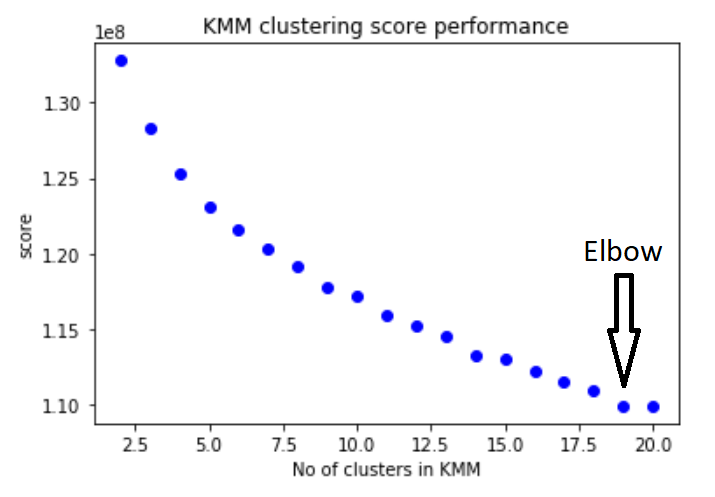
Based on the plot above we choose the number of cluster being 19 as it seems the elbow is happening at that point

In [65]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters=19).fit(azdias_clmis_pca)  
general_pop_kmm_pred = kmeans.predict(azdias_clmis_pca)

### Discussion 3.1: Apply Clustering to General Population

Based on the KMM clustering performance curve shown above. it looks like the performance is progressively improving as we increase the number of clusters. 

It is to note that generally we would like to see the curve flattens out and that would indicate the performance is not improving with adding the number of clusters, however this trend is a little less obvious in our model.

There seems to be evidence of flattening or so called "elbow" in the curver at n = 19. As a result, the number of clusters is selected to be 19 which shows a reasonable score.


### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [66]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep = ';')

In [67]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customers_clean = clean_data(customers)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [69]:
# Inspecting the cleanup function
customers_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141690 entries, 0 to 191651
Columns: 195 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_life_stage
dtypes: float64(66), int64(2), uint8(127)
memory usage: 91.8 MB


It looks like the cleanup function didn't work as expected on `customers` dataframe. the number of columns are 195 where this on the population dataframe after cleanup was 196. Let's investigate

In [70]:
# Get the difference in the columns of population and customers dataframe
list(set(azdias_clean1_low_missing.columns) - set(customers_clean.columns))

['GEBAEUDETYP_5.0']

`GEBAEUDETYP_5.0` is one of the categorial featured where we apply `get_dummy()` function to automatically get the dummy features, in which case 5.0 at the end means the added new feature to represent the data and type of categorial features existing in the column. Since this is automatic procedure, it looks like `GEBAEUDETYP_5.0` was not produced in the customer data, likely becasue the 5th type of categorial data didn't exist. we can go ahead and manually add a column to the customer data so the dataframe have the same structure as the population data

In [71]:
# Manually adding 'GEBAEUDETYP_5.0' column and imputing the values all to 0
customers_clean['GEBAEUDETYP_5.0'] = 0

In [72]:
# Imputing the missing data on customer dataframe
customers_ci = pd.DataFrame(imputer.transform(customers_clean))
customers_ci.columns = customers_clean.columns
customers_ci.index = customers_clean.index
print('Total number of Nans in customer data after cleaning and imputing :',customers_ci.isna().sum().sum())

# Scalling data on customer dataframe
data = customers_ci.values
data = scaler.transform(data)
customers_cis = pd.DataFrame(data)

# Applying PCA customer dataframe
customers_cis_pca = pca.transform(customers_cis)

Total number of Nans in customer data after cleaning and imputing : 0


In [73]:
customers_cis_pca

array([[ -4.34169733,   2.07129367,   3.4973849 , ...,   7.43660153,
         -9.8654259 ,   3.71714595],
       [  0.49374819,   4.40841262,  -0.3175774 , ...,   5.26305413,
         -9.94520446,   4.49075123],
       [ -3.64189648,   0.75605254,   1.96029464, ...,   2.2406598 ,
         -0.40771929,   0.64301875],
       ..., 
       [ -2.88430153,   2.50701465,   1.97180744, ...,   8.3515632 ,
        -11.55799313,   5.07878286],
       [ -1.22714086,   3.07725326,  -1.68073325, ...,   2.80849115,
         -0.62820395,   4.76777136],
       [ -4.04137276,  -0.9288156 ,   2.63736179, ...,   1.41523499,
         -1.53668103,   1.52433747]])

In [74]:
# KMM prediction on customer dataframe
customers_predic = kmeans.predict(customers_cis_pca)  

In [75]:
# Checking the shape of the prediction matrices 
print(customers_predic.shape)
print(general_pop_kmm_pred.shape)

(141690,)
(797837,)


### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [77]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
general_pop_kmm_pred_df = pd.DataFrame(general_pop_kmm_pred,columns=['cluster'],dtype=np.int8)
df1 = general_pop_kmm_pred_df['cluster'].value_counts()/general_pop_kmm_pred_df['cluster'].sum()*100
df1 = df1.sort_index()

customers_predic = pd.DataFrame(customers_predic,columns=['cluster'],dtype=np.int8)
df2 = customers_predic['cluster'].value_counts()/customers_predic['cluster'].sum()*100
df2 = df2.sort_index()

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize = (12, 6))
df1.plot(kind='bar', ax = ax1)
ax1.set_title('General population clusters')
ax1.set_ylabel('Percentage')
ax1.set_ylim(0.0, 4.0)
    
df2.plot(kind='bar', ax = ax2)
ax2.set_title('Customers clusters')
ax2.set_ylim(0.0, 4.0);


Looking at the plot above, it looks like cluster **1** is over-represented in the customer data

In [78]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
centroid_1 = scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_[1]))

In [81]:
# Remapping the over-predicted cluster to its column name
overrep = pd.Series(data = centroid_1, index = customers_clean.columns)
overrep

ALTERSKATEGORIE_GROB               3.340912
ANREDE_KZ                          0.456480
FINANZ_MINIMALIST                  3.361013
FINANZ_SPARER                      1.667506
FINANZ_VORSORGER                   4.351010
FINANZ_ANLEGER                     1.463545
FINANZ_UNAUFFAELLIGER              2.024670
FINANZ_HAUSBAUER                   3.795268
GREEN_AVANTGARDE                   0.442690
HEALTH_TYP                         2.130539
LP_LEBENSPHASE_FEIN               13.457593
LP_LEBENSPHASE_GROB                3.715069
RETOURTYP_BK_S                     4.313547
SEMIO_SOZ                          4.110890
SEMIO_FAM                          3.857581
SEMIO_REL                          3.138621
SEMIO_MAT                          3.577913
SEMIO_VERT                         4.656925
SEMIO_LUST                         5.231724
SEMIO_ERL                          5.057821
SEMIO_KULT                         3.595607
SEMIO_RAT                          3.097098
SEMIO_KRIT                      

Looking at the plot above, it looks like cluster **11** is under-represented in the customer data

In [82]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
centroid_11 = scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_[11]))

underrep = pd.Series(data = centroid_11, index = customers_clean.columns)
underrep

ALTERSKATEGORIE_GROB              1.807695
ANREDE_KZ                         0.985454
FINANZ_MINIMALIST                 1.071010
FINANZ_SPARER                     4.495054
FINANZ_VORSORGER                  2.175311
FINANZ_ANLEGER                    4.432547
FINANZ_UNAUFFAELLIGER             3.851950
FINANZ_HAUSBAUER                  4.376174
GREEN_AVANTGARDE                  0.032052
HEALTH_TYP                        2.171234
LP_LEBENSPHASE_FEIN               9.984479
LP_LEBENSPHASE_GROB               3.209300
RETOURTYP_BK_S                    2.598246
SEMIO_SOZ                         3.224261
SEMIO_FAM                         3.919316
SEMIO_REL                         5.369461
SEMIO_MAT                         4.675515
SEMIO_VERT                        2.268146
SEMIO_LUST                        3.296401
SEMIO_ERL                         4.396969
SEMIO_KULT                        4.075914
SEMIO_RAT                         5.946560
SEMIO_KRIT                        5.417064
SEMIO_DOM  

### Discussion 3.3: Compare Customer Data to Demographics Data

Below is the selected top 4 groups of features that fell into over-represented and under-represented categories

**Over-represented group:**

    - ALTERSKATEGORIE_GROB               (3.340912)
    - ANREDE_KZ                          (0.456480)
    - FINANZ_MINIMALIST                  (3.361013)
    - FINANZ_SPARER                      (1.667506)
    

**Under-represented group:**

    - ALTERSKATEGORIE_GROB               (1.807695)
    - ANREDE_KZ                          (0.985454)
    - FINANZ_MINIMALIST                  (1.071010)
    - FINANZ_SPARER                      (4.495054)
    
    
Looking at the weights above, it looks like `ALTERSKATEGORIE_GROB` (*46-60 age group people*) and `FINANZ_MINIMALIST` (*low financial interest*) were the ones that welcome the marketing company

On the same logic, it looks like `FINANZ_SPARER` (*money savers*) and `ALTERSKATEGORIE_GROB` (*30-45 age group people*) were not too keen on dealing with the marketing company

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.